<font color = red>Introduction to Business Analytics:<br>Using Python for Better Business Decisions</font>
=======
<br>
    <center><img src="http://dataanalyticscorp.com/wp-content/uploads/2018/03/logo.png"></center>
<br>
Taught by: 

* Walter R. Paczkowski, Ph.D. 

    * My Affliations: [Data Analytics Corp.](http://www.dataanalyticscorp.com/) and [Rutgers University](https://economics.rutgers.edu/people/teaching-personnel)
    * [Email Me With Questions](mailto:walt@dataanalyticscorp.com)
    * [Learn About Me](http://www.dataanalyticscorp.com/)
    * [See My LinkedIn Profile](https://www.linkedin.com/in/walter-paczkowski-a17a1511/)
    

# <font color = blue> Lesson \#2:<br>Data Visualization for Insight</font>

In this lesson, you will learn:

1. some fundamentals for visualizing your data; and
2. how to interpret basic graphs common in Business Analytics.

## <font color = black> Reset the Data from Lesson 1 </font>

Resetting the data will ensure that the work you did in Lesson 1 is available in this lesson.

In [1]:
##
## Load packages
##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
##
## Import the data.  The parse_dates argument says to 
## treat Tdate as a date object.
##
file = r'../Data/furniture/final data files/orders.csv'
df_orders = pd.read_csv( file, parse_dates = [ 'Tdate' ] )
pd.set_option('display.max_columns', 8)
##
## Initial Calculations
##
x = [ 'Ddisc', 'Odisc', 'Cdisc', 'Pdisc' ]
df_orders[ 'Tdisc' ] = df_orders[ x ].sum( axis = 1 )
##
df_orders[ 'Pprice' ] = df_orders.Lprice*( 1 - df_orders.Tdisc )
##
df_orders[ 'Rev' ] = df_orders.Usales * df_orders.Pprice
##
df_orders[ 'Con' ] = df_orders.Rev - df_orders.Mcost
df_orders[ 'CM' ] = df_orders.Con/df_orders.Rev
##
df_orders[ 'netRev' ] = ( df_orders.Usales - df_orders.returnAmount )*df_orders.Pprice
df_orders[ 'lostRev' ] = df_orders.Rev - df_orders.netRev
##
##
## Import a second DataFrame on the customers
##
file = r'../Data/furniture/final data files/customers.csv'
df_cust = pd.read_csv( file )
##
## Do an inner join using CID as the link
##
df = pd.merge( df_orders, df_cust, on = 'CID' )

## <font color = black> Look at the Distribution of Your Data </font>

In this section, you will learn to use

- *histograms*;
- *boxplots*;
- *kernel density plots*; and
- *hex bin plots*

to visualize your data.  The focus is on scientific visualization rather than infographics visualization.      

**Case Study Problem**:
<br><br>
The product manager wanted to know about sales patterns by:

- Marketing Region
- Customer Loyalty
- Buyer Rating



### <font color = black> Marketing Region Analysis </font>

Check the region counts.  This is a simple step to answer the question "*How many orders are there by marketing region*?" so it should be done.

In [2]:
##
## Use value_counts() method
##
df.Region.value_counts()

West         26170
Midwest      19565
South        15831
Northeast     8704
Name: Region, dtype: int64

In [3]:
##
## Use value_counts() method
## Use the "normalize = True" argument to get proportions
## Recommendation: always round proportions to 3 decimal places 
##
round( df.Region.value_counts( normalize = True ), 3 )

West         0.372
Midwest      0.278
South        0.225
Northeast    0.124
Name: Region, dtype: float64

### <font color = blue> Exercises </font>

####  <font color = black> Exercise \#2.1 </font>

Check the Customer Loyalty and Buyer Rating counts and proportions.

In [4]:
##
## Enter code here: Customer Loyalty
##


In [5]:
##
## Enter code here: Buyer Rating
##


**Solutions**:

In [6]:
df.loyaltyProgram.value_counts()

Yes    63662
No      6608
Name: loyaltyProgram, dtype: int64

In [7]:
df.buyerRating.value_counts()

Excellent    40592
Good         22436
Poor          7242
Name: buyerRating, dtype: int64

### <font color = black> Histograms </font>

You can use a histogram to examine the distribution of unit sales and the total discount calculated above.  Notice in the following display that a smooth line is overlayed.  This is a *kernel density estimate* (*KDE*).  You will see this again shortly.

C:\Users\Owner\Anaconda3_2018_12\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Proportions'),
 Text(0.5, 0, 'Unit Sales'),
 Text(0.5, 1.0, 'Unit Sales Distribution')]

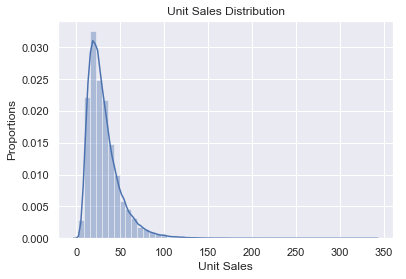

In [8]:
##
## histogram of unit sales
##
ax = sns.distplot( df.Usales )
ax.set( title = "Unit Sales Distribution", xlabel = 'Unit Sales', 
       ylabel = 'Proportions' )

The distrbution is highly skewed to the right which distorts the impression of the data.  Using the natural log will normalize the display.  This is helpful so when you model unit sales you should use a log transformation.  This next graph shows that the distribution (on a log scale) is fairly normal.

**Recommendation**: use the Numpy *log1p* function.  This returns the natural log of one plus the argument: $np.log1p( x ) = log_e(1 + x)$.  The reason for using this function is to avoid cases where $x = 0$: $log(0)$ is undefined, which is meaningless, but $log( 1 ) = 0$ so you would have a meaningful number.

[Text(0, 0.5, 'Proportions'),
 Text(0.5, 0, 'Unit Sales (Natural Log)'),
 Text(0.5, 1.0, 'Unit Sales Distribution: Log Scale')]

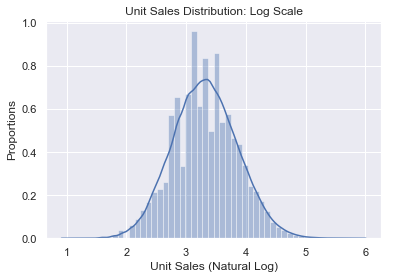

In [9]:
##
## Plot the natural log of unit sales
## A KDE curve is included by default
##
ax = sns.distplot( np.log1p( df.Usales) )
ax.set( title = "Unit Sales Distribution: Log Scale", 
       xlabel = 'Unit Sales (Natural Log)',
       ylabel = 'Proportions' )

You can add a *rug plot* to the bottom of the histogram to show each observation.  This is helpful to show where the data are for each bar in the histogram.  This, of course, is not practical for large data sets since the rug would just be a dense, black bar at the bottom of the graph.  
<br><br>
You can also remove the *KDE* curve for a better visualization of the distribution.

[Text(0, 0.5, 'Proportions'),
 Text(0.5, 0, 'Unit Sales (Natural Log)'),
 Text(0.5, 1.0, 'Unit Sales Distribution: Log Scale')]

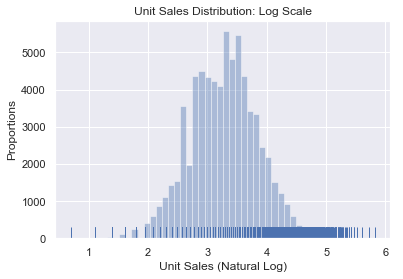

In [10]:
##
## Add a rug and remove the KDE
##
ax = sns.distplot( np.log( df.Usales), kde = False, rug = True )
ax.set( title = "Unit Sales Distribution: Log Scale", 
       xlabel = 'Unit Sales (Natural Log)', 
       ylabel = 'Proportions' )

You can display just the *KDE* curve for a cleaner view of the distribution.

[Text(0, 0.5, 'Proportions'),
 Text(0.5, 0, 'Unit Sales (Natural Log)'),
 Text(0.5, 1.0, 'Unit Sales Distribution: Log Scale')]

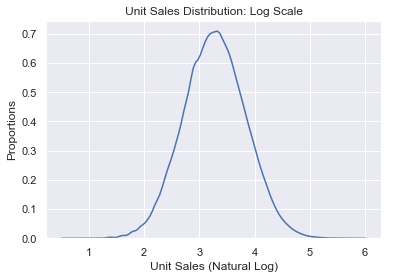

In [11]:
##
## KDE only
##
ax = sns.distplot( np.log( df.Usales), hist = False )
ax.set( title = "Unit Sales Distribution: Log Scale", 
       xlabel = 'Unit Sales (Natural Log)', 
       ylabel = 'Proportions' )

This looks very much like a normal distribution.  This will be important for *OLS* modeling which relies on normality.

### <font color = black> Boxplots </font>

Boxplots are the most useful visualization tool for examining distributions.

[Text(0, 0.5, 'Total Discount'),
 Text(0.5, 1.0, 'Distribution of Total Discount')]

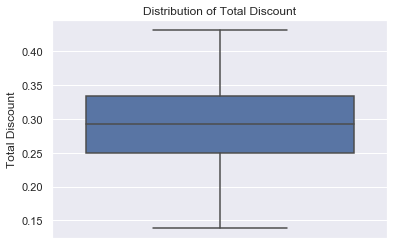

In [12]:
##
## Pocket price distribution with boxplots
## By regions
##
ax = sns.boxplot( y = 'Tdisc', data = df[ df.Region == 'Northeast' ] )
ax.set( title = 'Distribution of Total Discount', ylabel = 'Total Discount' )

The Total Discount is symmetrically distributed.

[Text(0, 0.5, 'Total Discount'),
 Text(0.5, 0, 'Marketing Regions'),
 Text(0.5, 1.0, 'Distribution of Total Discount by Region')]

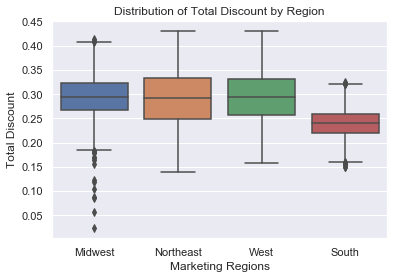

In [13]:
##
## Total discount distribution by regions
##
ax = sns.boxplot( x = 'Region', y = 'Tdisc', data = df )
ax.set( title = 'Distribution of Total Discount by Region', ylabel = 'Total Discount', 
       xlabel = 'Marketing Regions' )

Notice that discounts are the lowest in the Southern Region while the Midwest has a large number of very low discounts.  Also, the dispersion of the discounts in the Southern Region is small relative to that in the other three regions.  Let us drill down to verify the differences for the Southern Region.  Use Tukey's pairwise *HSD* test for this.

In [14]:
## 
## Compare the mean for each region using
## a multiple comparison test: Tukey's pairwise HSD test.
## Since there are four regions, there are six pairs.
##
## Load the multiple comparison package from statamodels
##
from statsmodels.stats.multicomp import pairwise_tukeyhsd
##
## Do the test.  The Null Hypothesis is no difference for each pair.
##
x = x = [ 'Region', 'Tdisc' ]
tmp = df[ x ]
tukey = pairwise_tukeyhsd( endog = tmp.Tdisc,     # Data
                          groups = tmp.Region,    # Groups
                          alpha = 0.05 )          # Significance level
print( '\nHull Hypothesis: No Difference in Pairwise Means' )
tukey.summary()    


Hull Hypothesis: No Difference in Pairwise Means


group1,group2,meandiff,lower,upper,reject
Midwest,Northeast,-0.0038,-0.0053,-0.0024,True
Midwest,South,-0.0549,-0.0561,-0.0537,True
Midwest,West,-0.0003,-0.0014,0.0008,False
Northeast,South,-0.0511,-0.0526,-0.0496,True
Northeast,West,0.0035,0.0021,0.0049,True
South,West,0.0546,0.0535,0.0558,True


The difference in the means is $meandiff = group2 - group1$. Notice that the Null Hypothesis is rejected for all combinations of the Southern Region and the other three (the last row of the table should be reversed to be consistent with the other Southern comparisons).  Also notice that the difference in the means for the Southern Region is negative in all cases.

We can look at the summary statistics by region using Pandas' *groupby* function.

In [15]:
##
## Group the total discount by region and then use the describe
## function on the groups.
##
df.Tdisc.groupby( df.Region ).describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Midwest,19565.0,0.294990,0.040023,0.023,0.267,0.295,0.323,0.414
Northeast,8704.0,0.291163,0.056135,0.139,0.249,0.293,0.334,0.431
South,15831.0,0.240060,0.028707,0.149,0.220,0.240,0.260,0.325
West,26170.0,0.294682,0.048876,0.158,0.258,0.294,0.331,0.431


[Text(0, 0, 'Dealer'),
 Text(0, 0, 'Order\nSize'),
 Text(0, 0, 'Competitive'),
 Text(0, 0, 'Pickup')]

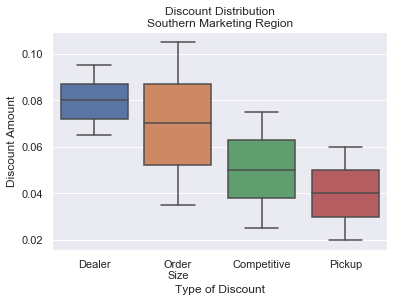

In [16]:
##
## Drill down on the discounts in the Southern Region
##
## Select the discounts for the Southern Region
##
x = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
df_south = df.loc[ df.Region == 'South', x ]
##
## Use a boxplot to examine the distributions.
##
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt( df_south ) )
ax.set( title = 'Discount Distribution\nSouthern Marketing Region', 
       xlabel = 'Type of Discount',
      ylabel = 'Discount Amount')
##
## Reset the tick labels to more meaningful labels
##
ax.set_xticklabels( [ 'Dealer', 'Order\nSize', 'Competitive', 'Pickup' ] )

Notice that the dealer discount tends to be the largest while the order discount has the most variation.

In [17]:
## 
## Compare the mean for each discount type using
## a multiple comparison test: Tukey's pairwise HSD test.
## Since there are four discounts, there are six pairs.
##
## First, convert the data from wide- to-long form
## using the Pandas melt function.  This returns a DataFrame
## with two columns: a label and a value.
##
df_melt = pd.melt( df_south )
##
## Do the test.  The Null Hypothesis is no difference for each pair.
##
tukey = pairwise_tukeyhsd(endog = df_melt.value,       # Data
                          groups = df_melt.variable,   # Groups
                          alpha=0.05)                          # Significance level
print( '\nHull Hypothesis: No Difference in Pairwise Means: Southern Region' )
tukey.summary()    


Hull Hypothesis: No Difference in Pairwise Means: Southern Region


group1,group2,meandiff,lower,upper,reject
Cdisc,Ddisc,0.0101,0.0097,0.0105,True
Cdisc,Odisc,-0.0196,-0.0201,-0.0192,True
Cdisc,Pdisc,-0.0297,-0.0301,-0.0293,True
Ddisc,Odisc,-0.0298,-0.0302,-0.0293,True
Ddisc,Pdisc,-0.0398,-0.0402,-0.0394,True
Odisc,Pdisc,-0.01,-0.0105,-0.0096,True


### <font color = blue> Exercises </font>

####  <font color = black> Exercise \#2.2 </font> 

Examine the Midwestern region.  This is more complicated since there are missing values in the Midwest.  First use *df.dropna( axis = 0, inplace = True )* to remove them. 

In [18]:
##
## Example
## Drop all rows with at least one missing value
## This example uses a temporary DataFrame
##
x = [ 'Tdisc', 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
tmp = df.loc[ df.Region == 'Midwest', x ]
##
## Before
##
print( '\nBefore:\n' )
print( tmp.info() )
##
## After
##
tmp.dropna( inplace = True )  ## axis = 0 is the default 
print( '\nAfter:\n' )
print( tmp.info() )


Before:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19565 entries, 0 to 70164
Data columns (total 5 columns):
Tdisc    19565 non-null float64
Ddisc    19557 non-null float64
Cdisc    19556 non-null float64
Odisc    19561 non-null float64
Pdisc    19563 non-null float64
dtypes: float64(5)
memory usage: 917.1 KB
None

After:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19552 entries, 1 to 70164
Data columns (total 5 columns):
Tdisc    19552 non-null float64
Ddisc    19552 non-null float64
Cdisc    19552 non-null float64
Odisc    19552 non-null float64
Pdisc    19552 non-null float64
dtypes: float64(5)
memory usage: 916.5 KB
None


In [19]:
##
## Enter code here.  Insert cells below this if needed.
##


**Solution**

[Text(0, 0, 'Dealer'),
 Text(0, 0, 'Order\nSize'),
 Text(0, 0, 'Competitive'),
 Text(0, 0, 'Pickup')]

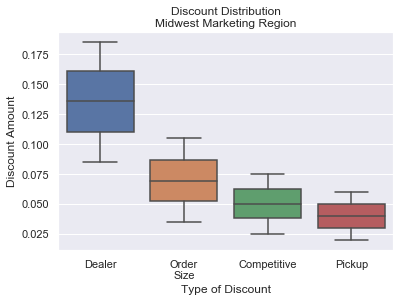

In [20]:
x = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
df_midwest = df.loc[ df.Region == 'Midwest', x ]
df_midwest.dropna( inplace = True )
##
## Box plot of discounts
##
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt( df_midwest ) )
ax.set( title = 'Discount Distribution\nMidwest Marketing Region', 
       xlabel = 'Type of Discount',
      ylabel = 'Discount Amount')
ax.set_xticklabels( [ 'Dealer', 'Order\nSize', 'Competitive', 'Pickup' ] )

In [21]:
## 
## Compare the mean for each discount type using
## a multiple comparison test: Tukey's pairwise HSD test.
## Since there are four discounts, there are six pairs.
##
## Melt or stack the DataFrame
##
df_melt = pd.melt( df_midwest )
##
## Do the test.  The Null Hypothesis is no difference for each pair.
## 
tukey = pairwise_tukeyhsd( endog = df_melt.value,      # Data
                          groups = df_melt.variable,   # Groups
                          alpha=0.05)              # Significance level
print( '\nHull Hypothesis: No Difference in Pairwise Means: Midwestern Region' )
tukey.summary()  


Hull Hypothesis: No Difference in Pairwise Means: Midwestern Region


group1,group2,meandiff,lower,upper,reject
Cdisc,Ddisc,0.0657,0.0652,0.0662,True
Cdisc,Odisc,-0.0197,-0.0202,-0.0192,True
Cdisc,Pdisc,-0.0298,-0.0303,-0.0293,True
Ddisc,Odisc,-0.0854,-0.0859,-0.0849,True
Ddisc,Pdisc,-0.0955,-0.096,-0.095,True
Odisc,Pdisc,-0.0101,-0.0106,-0.0096,True


You can examine the discounts by the customer loyalty status.

[Text(0, 0.5, 'Total Discount'),
 Text(0.5, 1.0, 'Distribution of Total Discount by Region \n and \n Loyalty Program')]

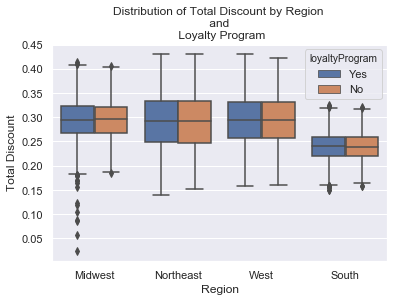

In [22]:
##
## Total discount distribution by regions and Loyalty Program
## members
##
ax = sns.boxplot( x = 'Region', y = 'Tdisc', hue = 'loyaltyProgram', data = df )
ax.set( title = 'Distribution of Total Discount by Region \n and \n Loyalty Program',
       ylabel = 'Total Discount' )

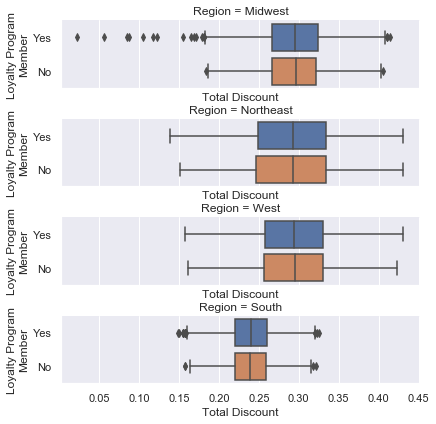

In [23]:
##
## Another view of total discount distribution by Regions and Loyalty Program
## members
##
ax = sns.catplot(x = 'Tdisc', y = 'loyaltyProgram', row = 'Region',
                kind = 'box', orient = 'h', height = 1.5, aspect = 4,
                data = df )
ax.set(  xlabel = 'Total Discount', ylabel = 'Loyalty Program\nMember'  )

It should be disturbing that the discounts are the same whether a customer is in the loyalty program or not.  Members should have bigger discounts.  What about how they are rated?

[Text(0, 0.5, 'Total Discount'),
 Text(0.5, 1.0, 'Distribution of Total Discount by Region \n and \n Buyer Rating')]

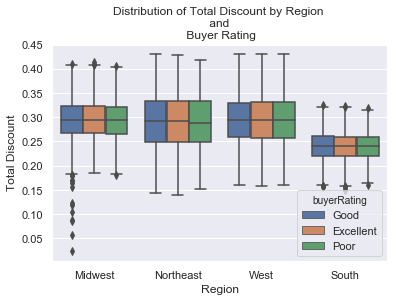

In [24]:
##
## Total discount distribution by regions and buyer rating
##
ax = sns.boxplot( x = 'Region', y = 'Tdisc', hue = 'buyerRating', data = df )
ax.set( title = 'Distribution of Total Discount by Region \n and \n Buyer Rating', 
       ylabel = 'Total Discount' )

Loyalty and good ratings are not rewarded.

### <font color = blue> Exercises </font>

####  <font color = black> Exercise \#2.3 </font> 

Examine the distribution of net revenue by region, loyalty program, and buyer rating.  What can you conclude?

In [25]:
##
## Enter code here
##


## <font color = black> Look for Relationships in Your Data </font> 

Scatter plots are the workhorse of statistical displays because they allow you to see relationships -- sometimes.  Properly drawn, they can provide a wealth of insight into the 

- relationships
- trends
- patterns
- anomalies

of two continuous variables.  They can be supplemented with histograms on the margins to show distributions.

### <font color = black> Transformation for Better Interpretation </font>

Since one objective from the product manager is to estimate a price elasticity, you should graph unit sales and Pocket Price.  We did notice earlier that unit sales were right skewed but that using a log transform shifted the distribution to a more normal one.  We should take the log of unit sales as well as pocket price.  This is a very common transformation in empirical demand analysis because the slope of a line is the elasticity.

In [26]:
##
## Transform unit sales and pocket price
##
df[ 'log_Pprice' ] = np.log1p( df.Pprice )
df[ 'log_Usales' ] = np.log1p( df.Usales )
##
## Display the unlogged and logged data
##
x = [ 'Pprice', 'log_Pprice', 'Usales', 'log_Usales' ]
##df.loc[ :, x ].head()
df[ x ].head()

,Pprice,log_Pprice,Usales,log_Usales
0,4.9410,1.781877,36,3.610918
1,3.7584,1.559911,57,4.060443
2,4.7412,1.747668,27,3.332205
3,4.8330,1.763531,21,3.091042
4,3.8232,1.573438,56,4.043051


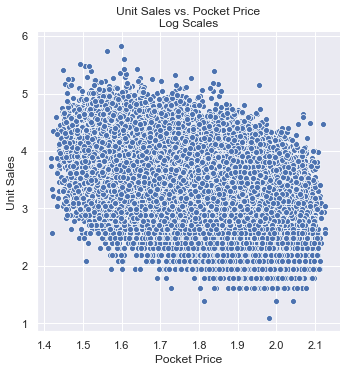

In [27]:
##
## Plot the logged data
## Use the Seaborn "relplot" function
##
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', data = df )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', xlabel = 'Pocket Price', 
       ylabel = 'Unit Sales' )

A negative relationship is evident -- as it should be.

### <font color = black> Enhancing the Scatter Plot </font>

[Text(0, 0.5, 'Unit Sales'),
 Text(0.5, 0, 'Pocket Price'),
 Text(0.5, 1.0, 'Unit Sales vs. Pocket Price\nLog Scales')]

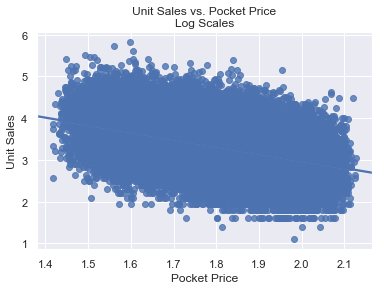

In [28]:
##
## Replot the logged data with a regression line added. 
## Use the Seaborn "regplot" function.
##
## Warning -- this will take a few seconds
##
ax = sns.regplot( x = 'log_Pprice', y = 'log_Usales', data = df )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', 
       xlabel = 'Pocket Price', ylabel = 'Unit Sales' )

### <font color = black> Adding a Categorical Variable </font>

You can add a third variable that is categorical to show relationships across groups.  This is done with a "hue" command which colors the points.

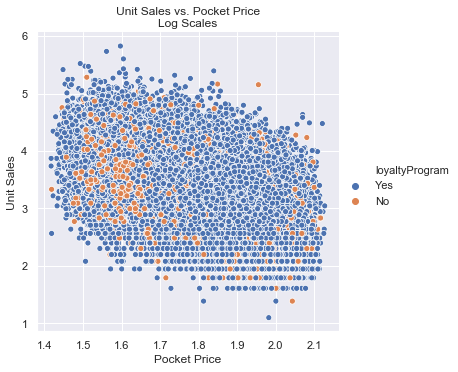

In [29]:
##
## Add Loyalty Program membership
##
## Warning -- this will take a few seconds
##
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', hue = 'loyaltyProgram', 
                 data = df )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', 
       xlabel = 'Pocket Price', 
       ylabel = 'Unit Sales' )

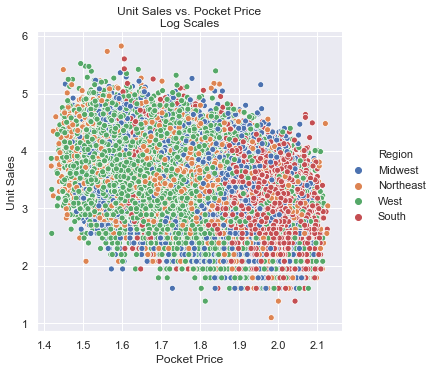

In [30]:
##
## Add Region
##
## Warning -- this will take a few seconds
##
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', hue = 'Region', data = df )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', 
       xlabel = 'Pocket Price', ylabel = 'Unit Sales' )

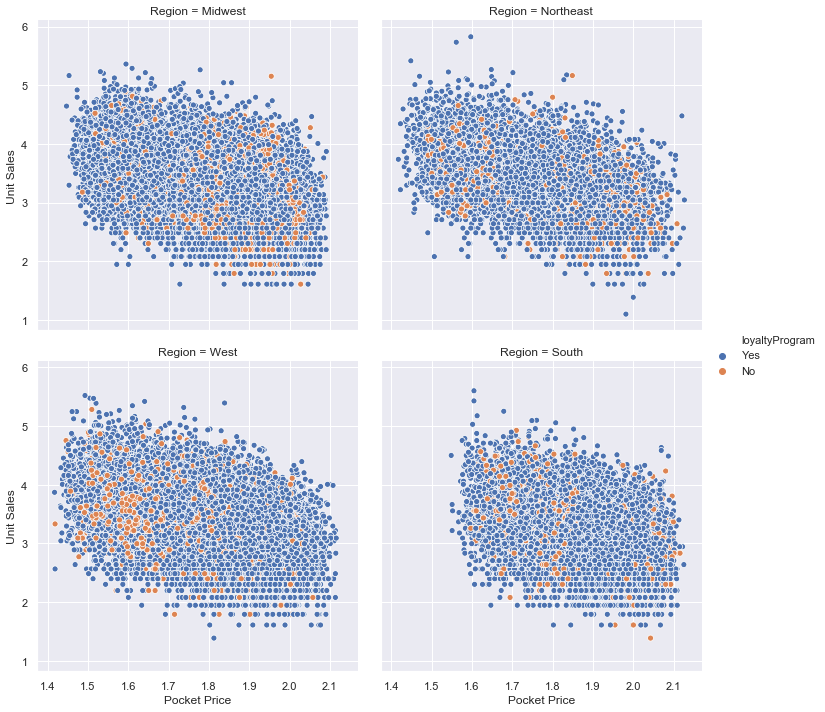

In [31]:
##
## Add Loyalty Program membership
## A less cluttered view with panels
##
## Warning -- this will take a few seconds
##
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', hue = 'loyaltyProgram', 
                 col = 'Region', col_wrap = 2,
                 data = df )
ax.set( xlabel = 'Pocket Price', ylabel = 'Unit Sales' )

Notice the gap between 17 and 19 in the Northeast.

### <font color = black> Combining Scatter Plots and Histograms </font>

You can combine scatter plots with histograms for each variable.

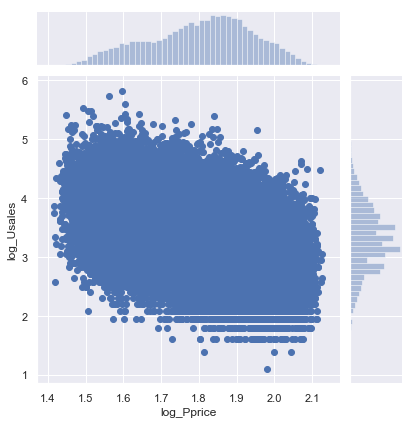

In [32]:
##
## Add histograms to the margins
##
ax = sns.jointplot( x = 'log_Pprice', y = 'log_Usales', data = df )

### <font color = black> Pairwise Scatter Plots </font>

You can also plot multiple variables in pair-wise combinations.

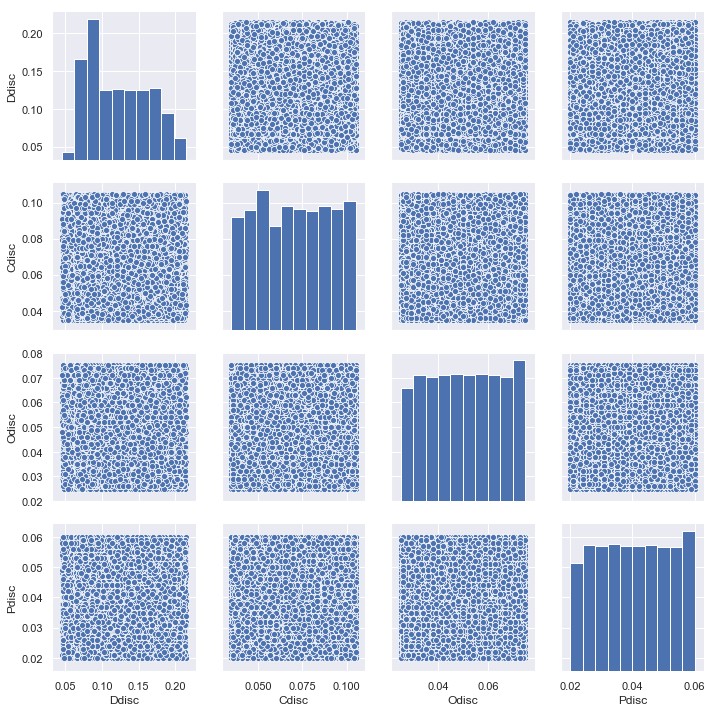

In [33]:
##
## Use the Seaborn pairwise function
##
x = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
##
## We know there are missing values for the discounts.
## Missing values are not handled well with Seaborn histograms.
## So drop all records with any missing data.
##
tmp = df[ x ].copy()
tmp.dropna( inplace = True )
sns.pairplot( tmp[ x ] )
##
## Warning -- this will take a few minutes
##

This particular plot is clearly not useful because the data set is large; we have a case of *Large-N*.  So how is this handled?

### <font color = black> Working with *Large-N* Data </font>

The scatter plots are dense, making it difficult to see some patterns. Options are:

- random sample
- contour plot
- hex plot

#### Random Sampling

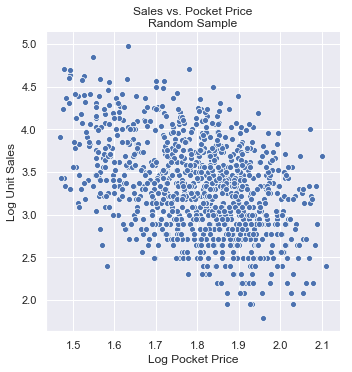

In [34]:
smpl = df.sample( n = 1000 )
ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', data = smpl,
                 kind = "scatter" )
ax.set( title = 'Sales vs. Pocket Price\nRandom Sample', 
       ylabel = 'Log Unit Sales', xlabel = 'Log Pocket Price' )

C:\Users\Owner\Anaconda3_2018_12\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\Anaconda3_2018_12\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


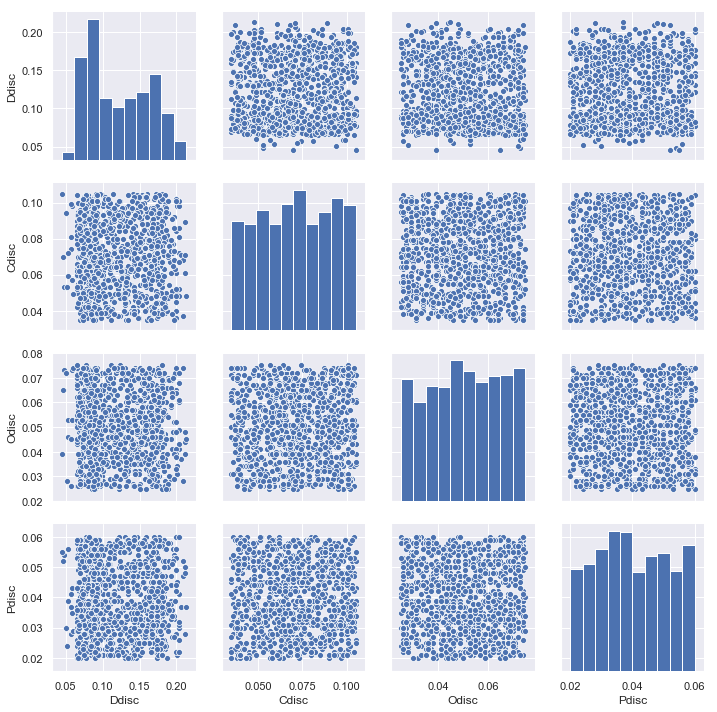

In [35]:
##
## Pairwise plot based on a random sample
##
x = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
sns.pairplot( smpl[ x ] )


Not much better.  Maybe a smaller sample will work.  You can try this on your own.

#### Contour Plot

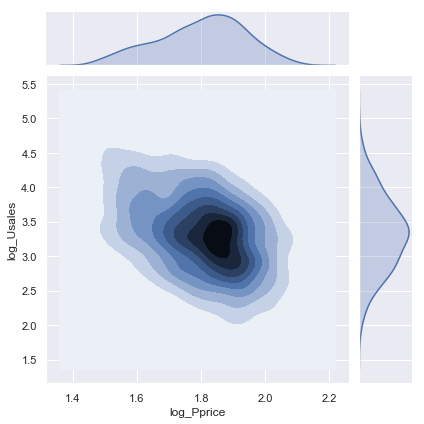

In [36]:
##
## Contour plot with margnal distributions
## Random sample
##
## Warning -- this will take a minute
##
ax = sns.jointplot( x = 'log_Pprice', y = 'log_Usales', data = smpl, kind = "kde" )

#### Hex Bin Plot

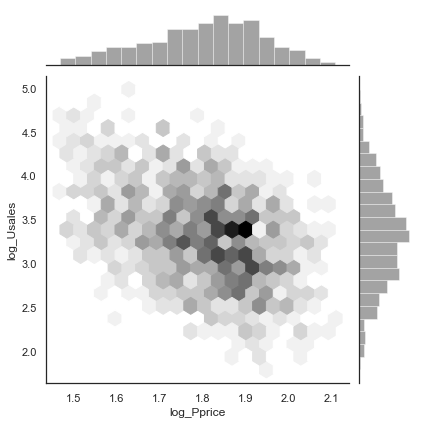

In [37]:
##
## Hex binning
## Random sample
## Note: A white background is best for this 
## Note: The plot element colors can be set: b:blue, 
##   g:green, r:red, c:cyan, m:magenta, y:yellow,
##   k:black, w:white.
##
## Warning -- this will take a minute
##
with sns.axes_style( 'white' ):
    ax = sns.jointplot(x = 'log_Pprice', y = 'log_Usales', data = smpl, 
                       kind="hex", color = 'k' )

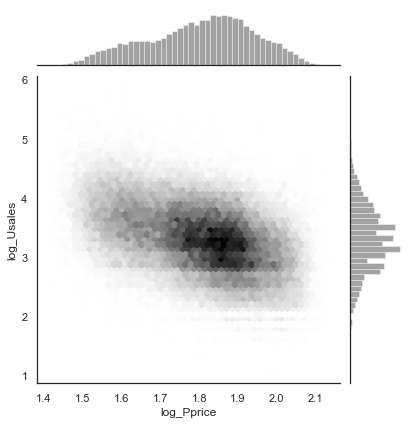

In [38]:
##
## Hex binning
## Full data set
## Note: A white background is best for this 
## Note: The plot element colors can be set: b:blue, 
##   g:green, r:red, c:cyan, m:magenta, y:yellow,
##   k:black, w:white.
##
## Warning -- this will take a minute
##
with sns.axes_style( 'white' ):
    ax = sns.jointplot(x = 'log_Pprice', y = 'log_Usales', data = df, 
                       kind="hex", color = 'k' )

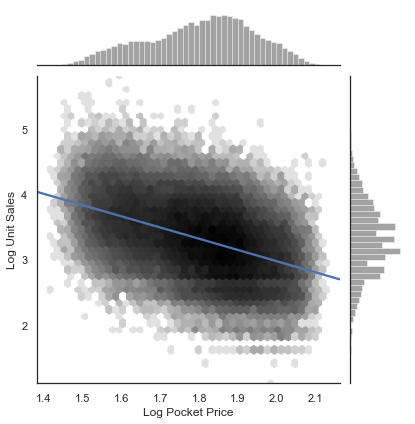

In [39]:
##
## Add a regression line
## Full data set
##
## Warning -- this will take a minute
##
with sns.axes_style("white"):
    g = sns.jointplot( x = 'log_Pprice', y = 'log_Usales', data = df, 
                      kind = 'hex', color = 'k',
                      joint_kws={'gridsize':40, 'bins':'log'} )
    ax = sns.regplot( x = 'log_Pprice', y = 'log_Usales', data = df, 
                     ax = g.ax_joint, scatter = False )
    ax.set( xlabel = 'Log Pocket Price', ylabel = 'Log Unit Sales' )

### <font color = blue> Exercises </font>

#### <font color = black> Exercise \#2.4 </font>

Study the relationship between any two variables of your choice.  What can you conclude?

In [40]:
##
## Enter code here.  Insert cells below this if needed.
##


## <font color = black> Look for Trends in Your Data </font> 

Trends are identified using line graphs, usually with time on the X-axis. 

In [41]:
##
## Subset the date indicator and the Dealer Discount
##
x = [ 'Tdate', 'Ddisc' ]
tmp = df_orders[ x ].copy()
##
## Reset the index to the date
##
tmp.set_index( 'Tdate', inplace = True )
tmp.head()

,Ddisc
Tdate,
2004-01-25,NaN
2004-01-25,0.157
2004-01-25,NaN
2004-01-25,NaN
2004-01-25,0.140


In [42]:
##
## Group the data by months and calculate the 
## mean discount for each month.
##
grp = tmp.groupby( pd.Grouper( freq = "M" ) ).mean()

[Text(0, 0.5, 'Dealer Discount'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Dealer Discount\nMonthly')]

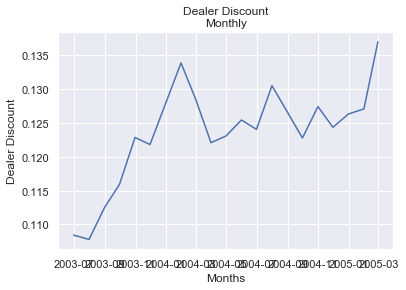

In [43]:
##
## Use the Seaborn lineplot function
##
ax = sns.lineplot( y = 'Ddisc', x = grp.index, data = grp )
ax.set( title = 'Dealer Discount\nMonthly', ylabel = 'Dealer Discount', xlabel = 'Months' )

[Text(0, 0.5, 'Dealer Discount'),
 Text(0.5, 0, 'Months'),
 Text(0.5, 1.0, 'Dealer Discount\nMonthly')]

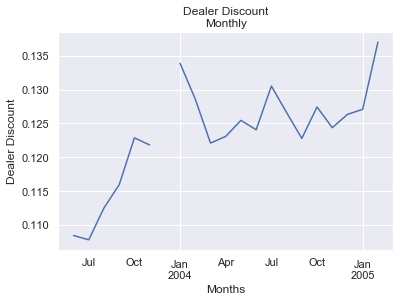

In [44]:
##
## An alternative way to plot uses Pandas' plot function.
## It automatically uses the index for the X-axis.
##
ax = grp.plot( y = 'Ddisc' , legend = False )
ax.set( title = 'Dealer Discount\nMonthly', ylabel = 'Dealer Discount', xlabel = 'Months' )

Notice the difference in the two time series plots.  Seaborn connects the points even if a point is missing; Pandas does not. Pandas gives a better representation and is better with time series data.

## <font color = black> Look for Anomalies in Your Data </font> 

The boxplots are good for this.  You can also see odd data points in distribution plots (histograms and boxplots), scatter plots, and time series.

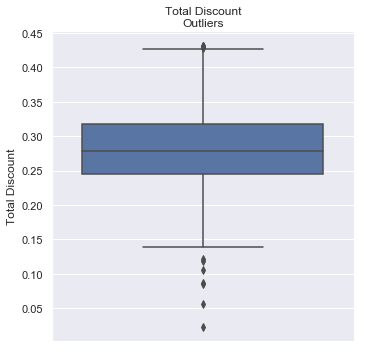

In [45]:
##
## Categorical plot: boxplot
##
ax = sns.catplot( 'Tdisc', kind = 'box', orient = 'v', data = df_orders )
ax.set( title = 'Total Discount\nOutliers', ylabel = 'Total Discount', xlabel = "")

## <font color = black> What's Next? </font>

In Lesson 3, I will show you how to build two predictive models:

1. *OLS*; and
2. Logit.

I'll discuss these in the next lesson.
<br><br><br>
<font color = red, size = "+3"><b> Five Minute Break </font>